<a href="https://colab.research.google.com/github/Jcasttrop/Neural-Networks-with-Python-and-Keras/blob/main/Problema_de_clasificaci%C3%B3n_multiple_para_un_noticiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import numpy as np

from keras import layers, models

In [217]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data.shape

(8982,)

Aqui tambien tenemos palabras que necesitan su procesamiento; es decir, (indice, tokenizacion, vectorizacion)

In [218]:
word_index = reuters.get_word_index()

word_index = dict([(value, key) for (key, value) in word_index.items()])


def vectorizacion(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))

  for i, sequences in enumerate(sequences):

    results[i, sequences] = 1

  return results

X_Train = vectorizacion(train_data)
X_Test = vectorizacion(test_data)

Veamos algo en train_labels

**Sobre Labels**

Previniendo un resultado del final, como tal dentro de keras no existe un diccionario que asocie las labels (el cual es un int) con su "nombre real"

https://github.com/keras-team/keras/issues/12072

Entonces el usuario SteffenBauer creó una libreria que hace ese trabajo:

https://martin-thoma.com/nlp-reuters/


In [219]:
train_labels[1]

#Como resultado nos está trayendo un número, que corresponde a una categoria,
#nosotros necesitamos hacerle onehot encoding

4

In [220]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [221]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [222]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(75, activation="relu", input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64  , activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(46, activation="softmax" )) #46 posibles salidas

"softmax es la activacion ideal para la clasificacion multiple"

'softmax es la activacion ideal para la clasificacion multiple'

In [223]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [224]:
x_validation = X_Train[:1000]
partial_x_train = X_Train[1000:]

y_validation = y_train[:1000]
partial_y_train = y_train[1000:]

Para este tipo de problemas es mejor utilizar Word Embeddings ya que one hot encoding no es eficiente en cuanto al huso de la memoria, para este ejemplo tenemos que generar un vector de 10000 entradas para poder codificar un feature o label.
Em cambio con Word Embeddings a cada palabra se le asocia un vector n-dimensional que puede ser de 128, 265, 512 … etc.
y este tipo de codificación te permite encontrar mejores relaciones entre las palabras.

para mas información revisar la documentación de TensorFlow en el siguiente enlace.

https://www.tensorflow.org/tutorials/text/word_embeddings?hl=es-419

In [225]:
history = model.fit(partial_x_train, partial_y_train,
          epochs= 16,
          batch_size = 512,
          validation_data = (x_validation,
                             y_validation))

model.evaluate(X_Test, y_test)

Epoch 1/16
16/16 [==============================] - 1s 28ms/step - loss: 2.8598 - accuracy: 0.4876 - val_loss: 1.9093 - val_accuracy: 0.6250
Epoch 2/16
16/16 [==============================] - 0s 16ms/step - loss: 1.7262 - accuracy: 0.6650 - val_loss: 1.5039 - val_accuracy: 0.6900
Epoch 3/16
16/16 [==============================] - 0s 16ms/step - loss: 1.4232 - accuracy: 0.7112 - val_loss: 1.3582 - val_accuracy: 0.7350
Epoch 4/16
16/16 [==============================] - 0s 16ms/step - loss: 1.2508 - accuracy: 0.7494 - val_loss: 1.2804 - val_accuracy: 0.7480
Epoch 5/16
16/16 [==============================] - 0s 16ms/step - loss: 1.1396 - accuracy: 0.7769 - val_loss: 1.2110 - val_accuracy: 0.7760
Epoch 6/16
16/16 [==============================] - 0s 16ms/step - loss: 1.0469 - accuracy: 0.8028 - val_loss: 1.1745 - val_accuracy: 0.7830
Epoch 7/16
16/16 [==============================] - 0s 15ms/step - loss: 0.9695 - accuracy: 0.8210 - val_loss: 1.1579 - val_accuracy: 0.7990
Epoch 8/16
16

[1.1547644138336182, 0.7902938723564148]

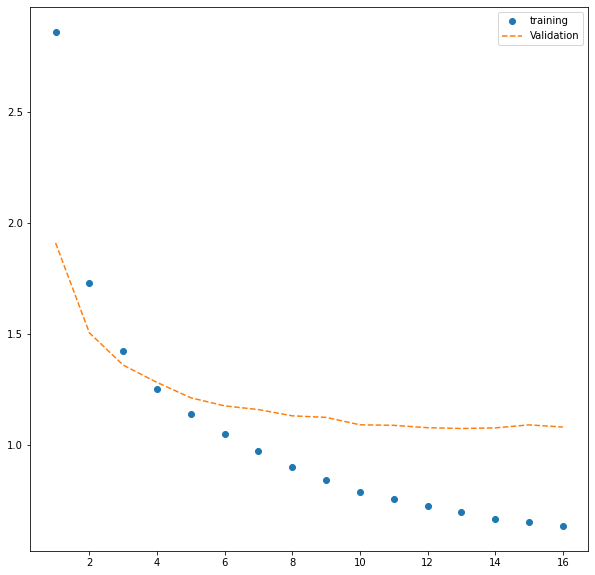

In [226]:
import matplotlib.pyplot as plt

history_dict = history.history #esto muestra cada una de las epocas
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

fig = plt.figure(figsize=(10,10))

epoch=range(1, len(loss_values) + 1)

plt.plot(epoch, loss_values, "o", label="training")
plt.plot(epoch, val_loss_values, "--", label="Validation")
plt.legend()
plt.show()

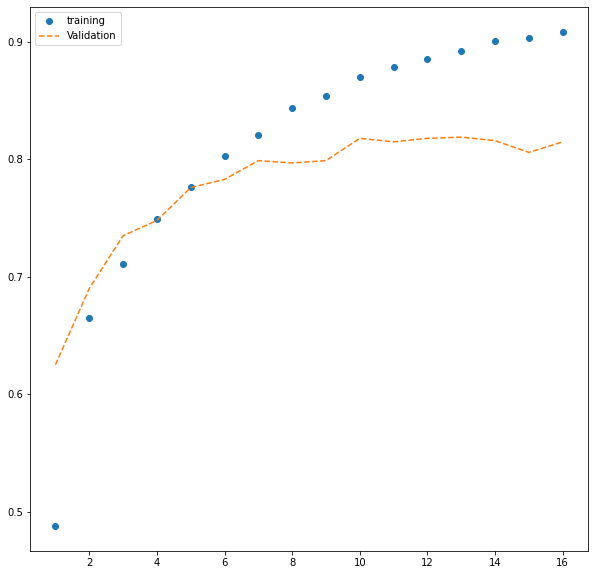

In [227]:
history_dict = history.history #esto muestra cada una de las epocas
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]

fig = plt.figure(figsize=(10,10))

epoch=range(1, len(loss_values) + 1)

plt.plot(epoch, loss_values, "o", label="training")
plt.plot(epoch, val_loss_values, "--", label="Validation")
plt.legend()
plt.show()

In [228]:
model.evaluate(X_Test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1548 - accuracy: 0.7903


[1.1547644138336182, 0.7902938723564148]

**Hacemos predicciones**

In [229]:
predictions = model.predict(X_Test)

print(predictions[0])

#Comprobamos que la prediccion da una probabilidad (suma total 1)
print(np.sum(predictions[0]))

#Para la fila 1 de nuestro data set, la prediccion es 
print(np.argmax(predictions[0]))

[2.77845061e-06 3.13775032e-04 7.07878826e-06 9.61751282e-01
 2.95167975e-02 3.71914648e-05 5.08601852e-06 1.69656632e-04
 2.91177607e-03 1.35734290e-05 4.82049400e-05 9.08566522e-04
 1.65263064e-05 1.81793992e-04 1.08134234e-04 1.03575931e-05
 8.51806370e-04 3.25723173e-04 9.09080063e-06 5.42699301e-04
 7.97815679e-04 8.06670505e-05 3.69969348e-05 6.01530592e-05
 4.80977815e-06 1.51904324e-05 4.06129402e-06 1.05046456e-04
 4.18469645e-05 6.63177780e-05 1.89465645e-05 5.57028834e-05
 5.42691532e-06 7.38278050e-06 3.10815813e-04 3.06195143e-05
 2.78026389e-04 8.35668743e-06 1.68667302e-05 1.91845786e-04
 2.00422232e-06 5.47012351e-05 2.33555365e-05 1.16066485e-05
 3.06858128e-05 8.84375277e-06]
1.0
3
